# 4) External Validation of e-MFD

In this notebook, we examine the performance of the e-MFD when scoring news documents. Specifically, we contrast moral signal extracted by the e-MFD with signal extracted my the original MFD (o-MFD) and MFD2.0. For this validation study, a separate, hold-out set of news articles will be used that was not part of creating the e-MFD. To extract the moral information contained in these news articles, we rely on Py-AMorE. Py-AMorE is a Python library that we have develooped for the fast and flexible extraciton of moral information from textual input documents. Specifically, we executed the following three commands to obtain moral information extracted from each dictionary:

- $pyamore data/validation_article.csv emfd bow emfd_output.csv

- $pyamore data/validation_article.csv mfd bow mfd_output.csv

- $pyamore data/validation_article.csv mfd2 bow mfd2_output.csv

For the **Moral Entity Framining** analysis, the following command was executed: 
- $pyamore data/validation_article.csv emfd pat pat_output.csv

***

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

***

In [2]:
# Load Output Files 
emfd_out = pd.read_csv('data/emfd_output.csv')
mfd2_out = pd.read_csv('data/mfd2_output.csv')
mfd_out = pd.read_csv('data/mfd_output.csv')

In [3]:
foundations = ['care.virtue','care.vice','fairness.virtue','fairness.vice','loyalty.virtue','loyalty.vice',
               'authority.virtue','authority.vice','sanctity.virtue','sanctity.vice']

In [4]:
probabilities = ['care_p','fairness_p','loyalty_p','authority_p','sanctity_p']

## 1) Explore Distributions of Scores

In [5]:
emfd_f= pd.melt(emfd_out[['care_p','fairness_p','loyalty_p','authority_p','sanctity_p']]).reset_index()
emfd_s=pd.melt(emfd_out[['care_sent','fairness_sent','loyalty_sent','authority_sent','sanctity_sent']]).reset_index()
emfd_meta = pd.melt(emfd_out[['f_var','sent_var','moral_nonmoral_ratio']]).reset_index()

In [6]:
mfd2_f = pd.melt(mfd2_out[foundations]).reset_index()

mfd_f = pd.melt(mfd_out[foundations]).reset_index()

In [7]:
def boxplot(df):
    g = sns.boxplot(x="variable", y="value",
            data=df)
    sns.despine(offset=10, trim=True)
    sns.swarmplot(x="variable", y="value", data=df,
              size=1, color=".7", linewidth=0)
    g.set_xticklabels(df.variable.unique(), rotation=35)
    return 

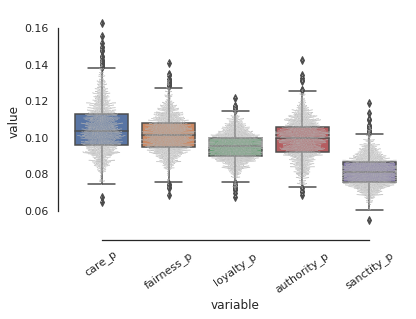

In [8]:
boxplot(emfd_f)

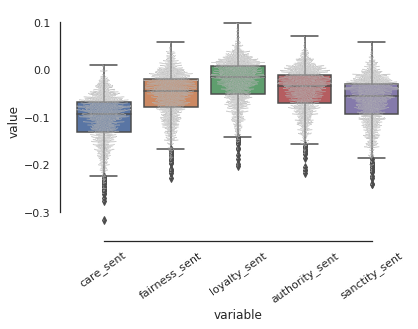

In [9]:
boxplot(emfd_s)

In [10]:
def boxplot(df):
    g = sns.boxplot(x="variable", y="value",
            data=df)
    sns.despine(offset=10, trim=True)
    sns.swarmplot(x="variable", y="value", data=df,
              size=1, color=".7", linewidth=0)
    g.set_xticklabels(foundations, rotation=35)
    return 

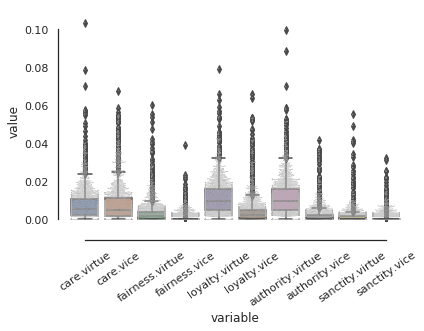

In [11]:
boxplot(mfd_f)

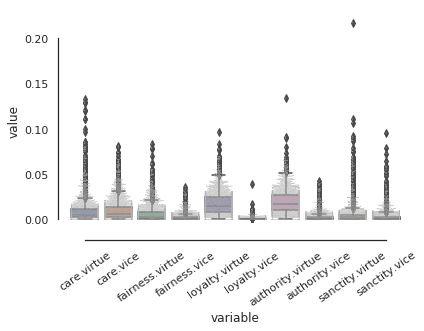

In [12]:
boxplot(mfd2_f)

***

## 2) Correlations between Word Scores Across Dictionaries

In [13]:
mfd_mfd2 = mfd2_out.join(mfd_out,lsuffix='_mfd2')

Text(0.5, 20.59375, 'MFD2.0')

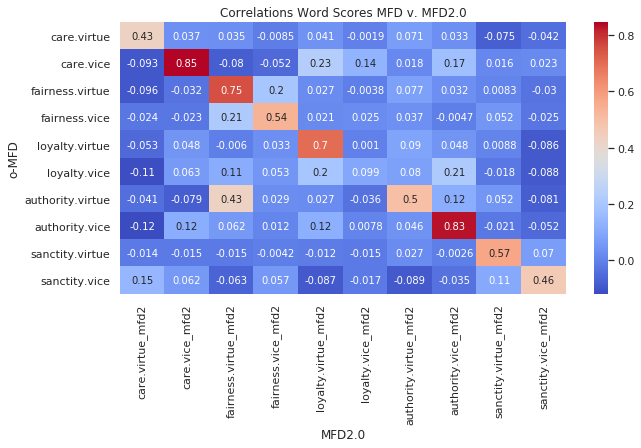

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(mfd_mfd2.corr()[[c+'_mfd2' for c in foundations]].loc[foundations], annot=True, cmap='coolwarm')
plt.title('Correlations Word Scores MFD v. MFD2.0')
plt.ylabel('o-MFD')
plt.xlabel('MFD2.0')

In [15]:
emfd_mfd = emfd_out.join(mfd_out, lsuffix='_emfd')

In [16]:
emfd_c = ['care_p','care_sent','fairness_p','fairness_sent','loyalty_p','loyalty_sent',
         'authority_p','authority_sent','sanctity_p','sanctity_sent']

Text(66.5, 0.5, 'o-MFD')

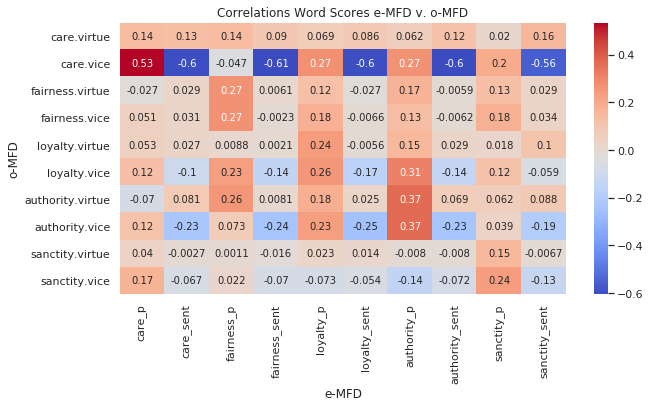

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(emfd_mfd.corr()[emfd_c].loc[foundations], annot=True, cmap='coolwarm')
plt.title('Correlations Word Scores e-MFD v. o-MFD')
plt.xlabel('e-MFD')
plt.ylabel('o-MFD')

In [18]:
emfd_mfd2 = emfd_out.join(mfd2_out, lsuffix='_emfd')

Text(66.5, 0.5, 'MFD2.0')

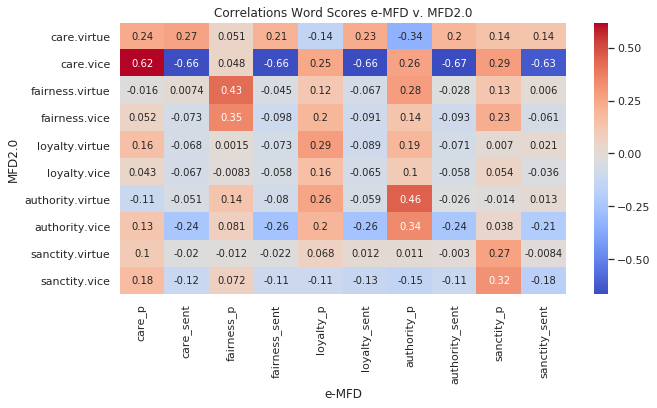

In [19]:
c_emfd = [c for c in emfd_mfd2.columns if c.endswith('_p') or c.endswith('_sent')]

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(emfd_mfd2.corr()[emfd_c].loc[foundations], annot=True, cmap='coolwarm')
plt.title('Correlations Word Scores e-MFD v. MFD2.0')
plt.xlabel('e-MFD')
plt.ylabel('MFD2.0')

***

## 3) Correlations with GDELT Topics

In [20]:
# Load News Articles w/ GDELT Metadata
news_text = pd.read_json('data/uncoded_news_text.json').set_index('url')
news = pd.read_pickle('data/uncoded_news_meta.pkl').set_index('url')
news = news.join(news_text['text'])
themes = [c for c in news.columns if c.isupper()] 
news = news[['share_count']+themes]
news = news.reset_index()
news['source'] = news['url'].apply(lambda row: row.split('.com')[0].split('.')[1])

In [21]:
# Join with e-MFD
emfd_gdelt = emfd_out.join(news)

Text(0.5, 1.0, 'Correlations of e-MFD Word Scores and GDELT Topics')

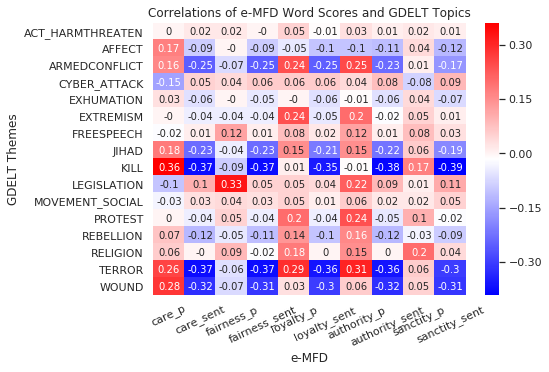

In [22]:
fig, ax = plt.subplots(figsize=(7,5))
emfd_gdelt.corr()[emfd_c].loc[themes]
g=sns.heatmap(emfd_gdelt.corr()[emfd_c].loc[themes].round(2), annot=True, cmap='bwr')
g.set_xticklabels(emfd_c, rotation=25)
plt.xlabel('e-MFD')
plt.ylabel('GDELT Themes')
plt.title('Correlations of e-MFD Word Scores and GDELT Topics')

Text(0.5, 1.0, 'Correlations of o-MFD Word Scores and GDELT Topics')

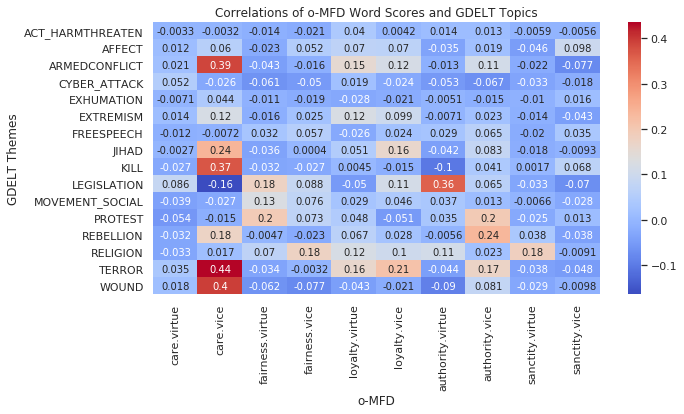

In [23]:
# Join with MFD
mfd_gdelt = mfd_out.join(news)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(mfd_gdelt.corr()[foundations].loc[themes], annot=True, cmap='coolwarm')
plt.title('Correlations Word Scores MFD v. MFD2.0')
plt.ylabel('GDELT Themes')
plt.xlabel('o-MFD')
plt.title('Correlations of o-MFD Word Scores and GDELT Topics')

Text(0.5, 1.0, 'Correlations of MFD2.0 Word Scores and GDELT Topics')

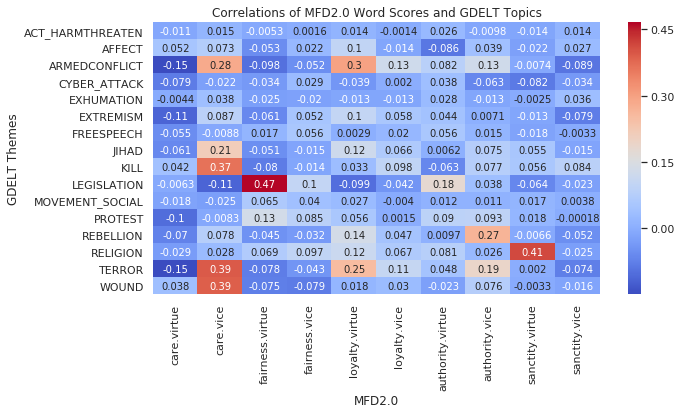

In [24]:
# Join with MFD
mfd2_gdelt = mfd2_out.join(news)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(mfd2_gdelt.corr()[foundations].loc[themes], annot=True, cmap='coolwarm')
plt.title('Correlations Word Scores MFD v. MFD2.0')
plt.ylabel('GDELT Themes')
plt.xlabel('MFD2.0')
plt.title('Correlations of MFD2.0 Word Scores and GDELT Topics')

***

## 4) Partisan News Framing

In [25]:
emfd_f = pd.melt(emfd_gdelt[probabilities])
emfd_s = pd.melt(pd.DataFrame(emfd_gdelt[probabilities+['source']]), id_vars='source')['source']
emfd_source = emfd_f.join(emfd_s, rsuffix='_source')
emfd_source = emfd_source[emfd_source['source'].isin(['breitbart','huffingtonpost', 'nytimes'])]
emfd_source['source'] = emfd_source['source'].str.capitalize()

[Text(0, 0, 'Care'),
 Text(0, 0, 'Fairness'),
 Text(0, 0, 'Loyalty'),
 Text(0, 0, 'Authority'),
 Text(0, 0, 'Sanctity')]

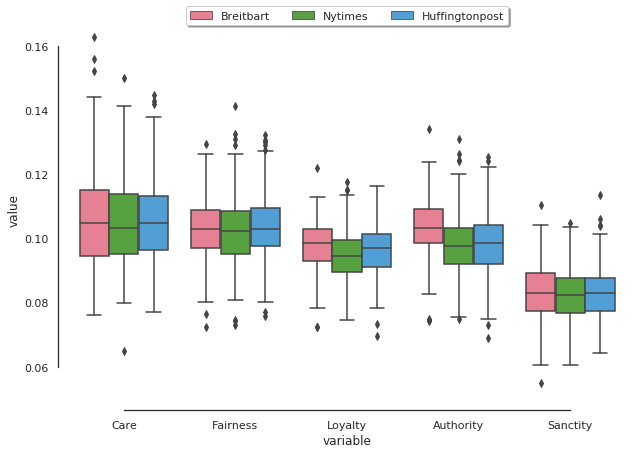

In [26]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,7))
g = sns.boxplot(x='variable', y='value', hue='source', data = emfd_source, palette='husl')
sns.despine(offset=10, trim=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True)
g.set_xticklabels(['Care','Fairness','Loyalty','Authority','Sanctity'])

In [27]:
mfd_gdelt['Care'] = mfd_gdelt['care.virtue'] + mfd_gdelt['care.vice']
mfd_gdelt['Fairness'] = mfd_gdelt['fairness.virtue'] + mfd_gdelt['fairness.vice']
mfd_gdelt['Loyalty'] = mfd_gdelt['loyalty.virtue'] + mfd_gdelt['loyalty.vice']
mfd_gdelt['Authority'] = mfd_gdelt['authority.virtue'] + mfd_gdelt['authority.vice']
mfd_gdelt['Sanctity'] = mfd_gdelt['sanctity.virtue'] + mfd_gdelt['sanctity.vice']

In [28]:
mfd_f = pd.melt(mfd_gdelt[['Care','Fairness','Loyalty','Authority','Sanctity']])
mfd_s = pd.melt(pd.DataFrame(mfd_gdelt[foundations+['source']]), id_vars='source')['source']
mfd_source = mfd_f.join(mfd_s, rsuffix='_source')
mfd_source = mfd_source[mfd_source['source'].isin(['breitbart','huffingtonpost', 'nytimes'])]
mfd_source['source'] = mfd_source['source'].str.capitalize()

[Text(0, 0, 'Care'),
 Text(0, 0, 'Fairness'),
 Text(0, 0, 'Loyalty'),
 Text(0, 0, 'Authority'),
 Text(0, 0, 'Sanctity')]

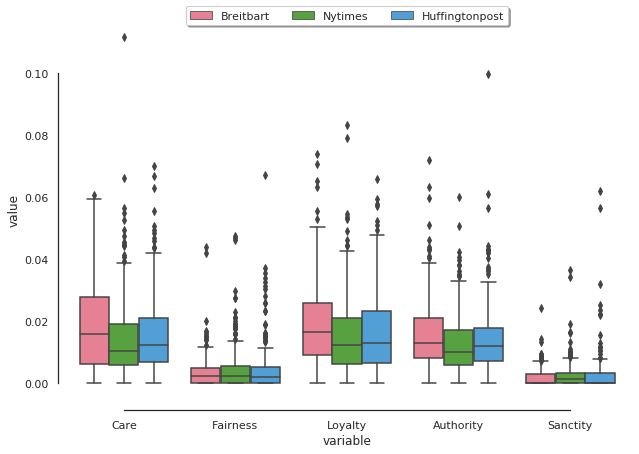

In [29]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,7))
g = sns.boxplot(x='variable', y='value', hue='source', data = mfd_source, palette='husl')
sns.despine(offset=10, trim=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True)
g.set_xticklabels(['Care','Fairness','Loyalty','Authority','Sanctity'])

In [30]:
mfd2_gdelt['Care'] = mfd2_gdelt['care.virtue'] + mfd2_gdelt['care.vice']
mfd2_gdelt['Fairness'] = mfd2_gdelt['fairness.virtue'] + mfd2_gdelt['fairness.vice']
mfd2_gdelt['Loyalty'] = mfd2_gdelt['loyalty.virtue'] + mfd2_gdelt['loyalty.vice']
mfd2_gdelt['Authority'] = mfd2_gdelt['authority.virtue'] + mfd2_gdelt['authority.vice']
mfd2_gdelt['Sanctity'] = mfd2_gdelt['sanctity.virtue'] + mfd2_gdelt['sanctity.vice']

In [31]:
mfd2_f = pd.melt(mfd2_gdelt[['Care','Fairness','Loyalty','Authority','Sanctity']])
mfd2_s = pd.melt(pd.DataFrame(mfd2_gdelt[foundations+['source']]), id_vars='source')['source']
mfd2_source = mfd_f.join(mfd2_s, rsuffix='_source')
mfd2_source = mfd_source[mfd2_source['source'].isin(['breitbart','huffingtonpost', 'nytimes'])]
mfd2_source['source'] = mfd2_source['source'].str.capitalize()

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


[Text(0, 0, 'Care'),
 Text(0, 0, 'Fairness'),
 Text(0, 0, 'Loyalty'),
 Text(0, 0, 'Authority'),
 Text(0, 0, 'Sanctity')]

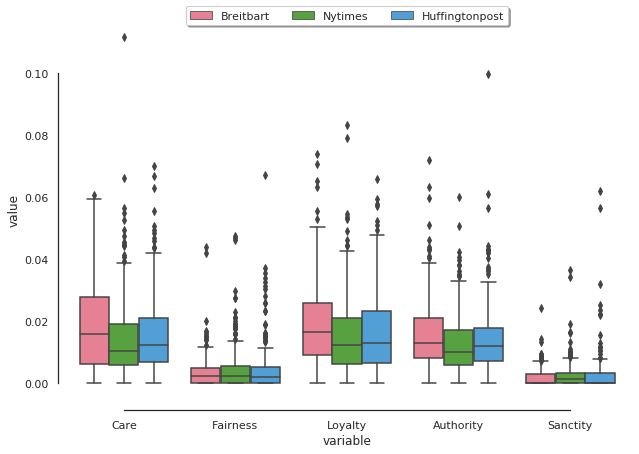

In [32]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,7))
g = sns.boxplot(x='variable', y='value', hue='source', data = mfd2_source, palette='husl')
sns.despine(offset=10, trim=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True)
g.set_xticklabels(['Care','Fairness','Loyalty','Authority','Sanctity'])

## 5) Prediction of News Article Engagement

In [33]:
# Distribution of Share Counts
news['share_count'].describe()

count      1985.000000
mean        726.608060
std        3932.933728
min           0.000000
25%          10.000000
50%          72.000000
75%         330.000000
max      102431.000000
Name: share_count, dtype: float64

In [34]:
# Exclude 0 shares and top 5% 
news_cut = news[np.logical_and(news['share_count'] > 0, news['share_count'] < news['share_count'].quantile(0.9))]
print('Remaining news articles:', len(news_cut))

Remaining news articles: 1607


Text(0, 0.5, 'Density')

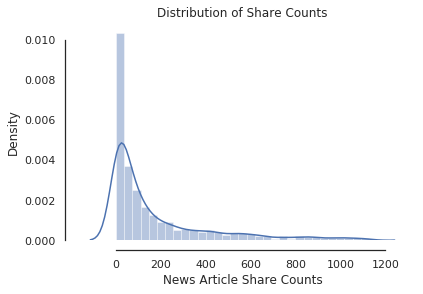

In [35]:
sns.distplot(news_cut['share_count'])
sns.despine(offset=10, trim=True)
plt.title('Distribution of Share Counts')
plt.xlabel('News Article Share Counts')
plt.ylabel('Density')

In [36]:
# Log-Transform distribution 
def log_transform(row, min_v):
    return np.log(row) / min_v

In [37]:
news_cut['share_count'] = news_cut['share_count'].apply(pd.to_numeric)
news_cut['ln_share'] = news_cut['share_count'].apply(lambda row: log_transform(row,news_cut['share_count'].min()))

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Density')

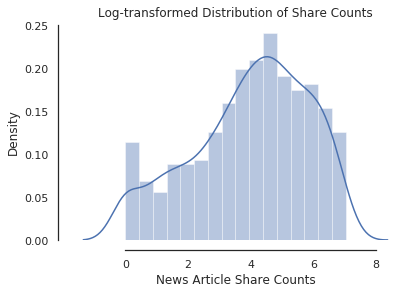

In [38]:
sns.distplot(news_cut['ln_share'])
sns.despine(offset=10, trim=True)
plt.title('Log-transformed Distribution of Share Counts')
plt.xlabel('News Article Share Counts')
plt.ylabel('Density')

In [39]:
import statsmodels.api as sm

In [40]:
# Join with dictionaries
emfd_shares = news_cut.join(emfd_out)[emfd_c+['ln_share']]
mfd_shares = news_cut.join(mfd_out)[foundations+['ln_share']]
mfd2_shares = news_cut.join(mfd2_out)[foundations+['ln_share']]

In [41]:
# e-MFD prediction 
X = emfd_shares[emfd_c]
Y = emfd_shares['ln_share']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_share   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.851
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           1.03e-08
Time:                        11:36:02   Log-Likelihood:                -3238.8
No. Observations:                1607   AIC:                             6500.
Df Residuals:                    1596   BIC:                             6559.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5094      0.767      1.

/usr/local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
# o-MFD prediction 
X = mfd_shares[foundations]
Y = mfd_shares['ln_share']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_share   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.270
Date:                Thu, 20 Jun 2019   Prob (F-statistic):             0.0123
Time:                        11:36:02   Log-Likelihood:                -3256.4
No. Observations:                1607   AIC:                             6535.
Df Residuals:                    1596   BIC:                             6594.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.8015      0.109  

/usr/local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
# MFD2 prediction 
X = mfd2_shares[foundations]
Y = mfd2_shares['ln_share']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_share   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Thu, 20 Jun 2019   Prob (F-statistic):             0.0236
Time:                        11:36:02   Log-Likelihood:                -3257.3
No. Observations:                1607   AIC:                             6537.
Df Residuals:                    1596   BIC:                             6596.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.7029      0.124  

/usr/local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [58]:
# Save original data files
news.join(emfd_out)[emfd_c+['share_count']].to_csv('data/emfd_shares.csv')
news.join(mfd_out)[foundations+['share_count']].to_csv('data/mfd_shares.csv')
news.join(mfd2_out)[foundations+['share_count']].to_csv('data/mfd2_shares.csv')

***

## 6) Moral Entity Framing

In [44]:
emfd = pd.read_pickle('dictionaries/emfd_scoring.pkl')

In [45]:
from collections import Counter

In [46]:
import networkx as nx

In [47]:
pat = pd.read_csv('data/pat_output.csv')

In [48]:
# Build agent network for Trump
trump_agent = ','.join(pat[pat['NER'].str.contains('Trump')]['agent_words'].dropna().values).split(',')
trump_agent_f = pat[pat['NER'].str.contains('Trump')][[c for c in pat.columns if c.startswith('agent') and c.endswith('_p')]].mean()

In [49]:
trump_agent_word = pd.DataFrame(trump_agent, columns=['word']).set_index('word')
trump_agent_word = trump_agent_word.join(emfd).sort_values('care_p', ascending=False).drop_duplicates()
trump_agent_word['counts'] = pd.Series(Counter(trump_agent))
trump_agent_word['moral_sum'] = trump_agent_word[probabilities].sum(axis=1)
trump_agent_word['moral_score'] = trump_agent_word['counts'] * trump_agent_word['moral_sum']
trump_agent_word = trump_agent_word.iloc[pd.np.where(trump_agent_word[probabilities].ge(0.15).any(1, skipna=True))]
trump_agent_dict = trump_agent_word.sort_values('moral_score', ascending=False).head(20)[['moral_score','counts']].T.to_dict()
trump_agent_words = trump_agent_dict.keys()

In [50]:
trump_agent_counts = [('Donald Trump',x,y['counts']) for x,y in trump_agent_dict.items()]
trump_agent_scores = {x:y['moral_score'] for x,y in trump_agent_dict.items()}

In [51]:
G=nx.Graph()
G.add_node('Donald Trump')
G.add_nodes_from(trump_agent_words)
G.add_weighted_edges_from(trump_agent_counts, weight='weight')
nx.set_node_attributes(G,'moral_score', trump_agent_scores)

In [52]:
nx.write_gexf(G, 'data/trump_agent.gexf')

***

In [53]:
trump_patient = ','.join(pat[pat['NER'].str.contains('Trump')]['patient_words'].dropna().values).split(',')
trump_patient_f = pat[pat['NER'].str.contains('Trump')][[c for c in pat.columns if c.startswith('patient') and c.endswith('_p')]].mean()

In [54]:
trump_patient_word = pd.DataFrame(trump_patient, columns=['word']).set_index('word')
trump_patient_word = trump_patient_word.join(emfd).sort_values('care_p', ascending=False).drop_duplicates()
trump_patient_word['counts'] = pd.Series(Counter(trump_patient))
trump_patient_word['moral_sum'] = trump_patient_word[probabilities].sum(axis=1)
trump_patient_word['moral_score'] = trump_patient_word['counts'] * trump_patient_word['moral_sum']
trump_patient_word = trump_patient_word.iloc[pd.np.where(trump_patient_word[probabilities].ge(0.15).any(1, skipna=True))]
trump_patient_dict = trump_patient_word.sort_values('moral_score', ascending=False).head(20)[['moral_score','counts']].T.to_dict()
trump_patient_words = trump_patient_dict.keys()

In [55]:
trump_patient_counts = [('Donald Trump',x,y['counts']) for x,y in trump_patient_dict.items()]
trump_patient_scores = {x:y['moral_score'] for x,y in trump_patient_dict.items()}

In [56]:
G=nx.Graph()
G.add_node('Donald Trump')
G.add_nodes_from(trump_patient_words)
G.add_weighted_edges_from(trump_patient_counts, weight='weight')
nx.set_node_attributes(G,'moral_score', trump_patient_scores)

In [57]:
nx.write_gexf(G, 'data/trump_patient.gexf')